In [1]:
# import package
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm

In [2]:
# import data
uts = pd.read_csv('dataset-Klasifikasi-Minicase3.csv')
uts

,no,trans_date_trans_time,merchant,category,amt,gender,is_fraud
0,0,6/21/2020 12:14,fraud_Kirlin and Sons,personal_care,2.86,M,0
1,1,6/21/2020 12:14,fraud_Sporer-Keebler,personal_care,29.84,F,0
2,2,6/21/2020 12:14,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,0
3,3,6/21/2020 12:15,fraud_Haley Group,misc_pos,60.05,M,0
4,4,6/21/2020 12:15,fraud_Johnston-Casper,travel,3.19,M,0
...,...,...,...,...,...,...,...
972,972,8/2/2020 22:39,"fraud_Schiller, Blanda and Johnson",home,241.34,F,1
973,973,8/2/2020 22:50,"fraud_Klocko, Runolfsdottir and Breitenberg",health_fitness,17.29,F,1
974,974,8/2/2020 22:57,"fraud_Turner, Ziemann and Lehner",food_dining,135.12,F,1
975,975,8/2/2020 23:28,"fraud_Rippin, Kub and Mann",misc_net,850.64,M,1


## Data Visualization
Melakukan visualisasi data dari fitur-fitur yang ada (minimal 3)

In [3]:
# Import package
import seaborn as sns
import matplotlib.pyplot as plt

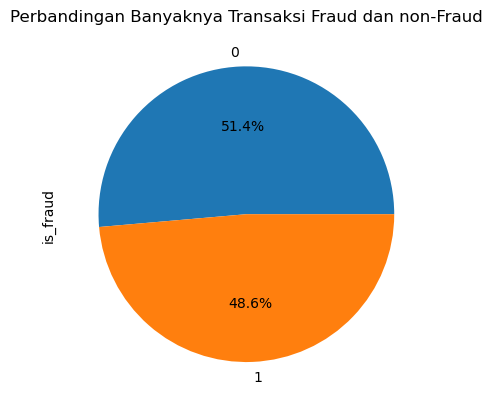

In [5]:
# Mencari perbandingan antara fraud dan non fraud
uts['is_fraud'].value_counts().plot.pie(autopct='%1.1f%%', shadow=False)
plt.title("Perbandingan Banyaknya Transaksi Fraud dan non-Fraud")
plt.show()

Melalui pie chart di atas, diketahui bahwa perbandingan antara transaksi fraud dengan non fraud cukup seimbang meskipun transaksi fraud (ditandai dengan 0 lebih banyak 2.8%) dengan perbandingan transaksi fraud (1) sebanyak 48.6% dan transaksi non-fraud (0) sebanyak 51.4%

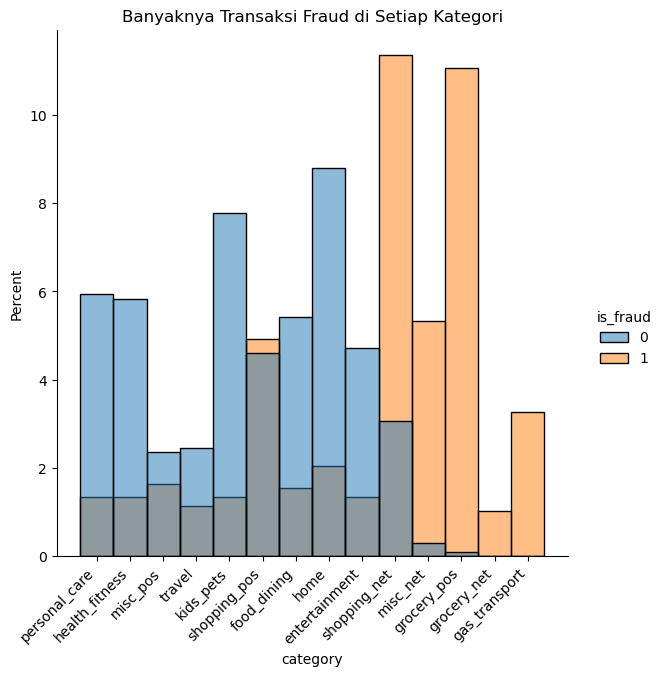

In [4]:
# banyaknya transaksi fraud di tiap kategori
p = sns.displot(data=uts, x='category', stat='percent', hue='is_fraud', height=6)
plt.title('Banyaknya Transaksi Fraud di Setiap Kategori')
plt.xticks(rotation=45, horizontalalignment="right")
plt.show()


Dari distribution plot di atas, kategori dengan transaksi fraud paling sedikit adalah kategori travel, sedangkan transaksi fraud terbanyak dipegang oleh kategori shopping_net, disusul oleh grocery_net dan misc_net.

Mengetahui hal ini, maka perusahaan perlu mengidentifikasi lebih lanjut terkait history transaksi setiap kategori dengan cara:

1. Menerapkan SOP yang ketat

2. Mengadakan pelatihan anti-fraud

3. Menggunakan teknologi anti-fraud (software audit / sistem deteksi fraud)

4. Mengadakan audit internal secara berkala

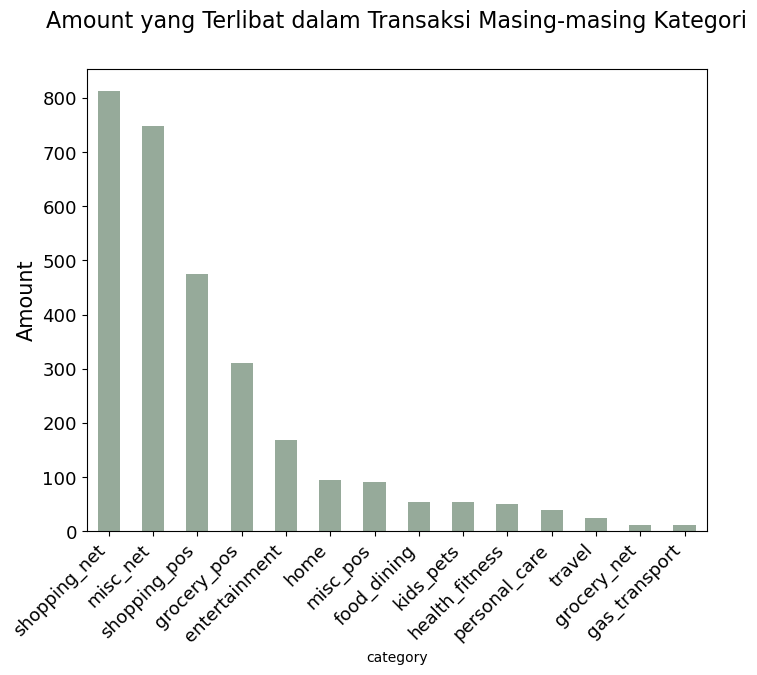

In [8]:
# Jumlah Uang yang Terlibat dalam transaksi masing-masing kategori
viz2 = uts.groupby('category')['amt'].mean().sort_values(ascending=False)
viz2

# Buat plotnya
ax = viz2.plot(kind='bar', figsize=(8,6), color="#96aa9a", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Amount yang Terlibat dalam Transaksi Masing-masing Kategori", fontsize=16, pad=30)
ax.set_ylabel("Amount", fontsize=15)
plt.xticks(rotation=45, horizontalalignment="right");
plt.show()

Dari grafik di atas, diketahui bahwa rata-rata jumlah uang yang terlibat dalam transaksi terbanyak jatuh pada kategori shopping_net. namun, mengetahui fakta bahwa transaksi fraud terbanyak jatuh kepada kategori shopping_net, maka bisa diasumsikan bahwa jumlah uang yang digunakan dalam transaksi pada kategori shopping_net bukan uang sesungguhnya. Hal ini tentu dapat memberikan pengaruh yang kurang baik terhadap operasional perusahaan.

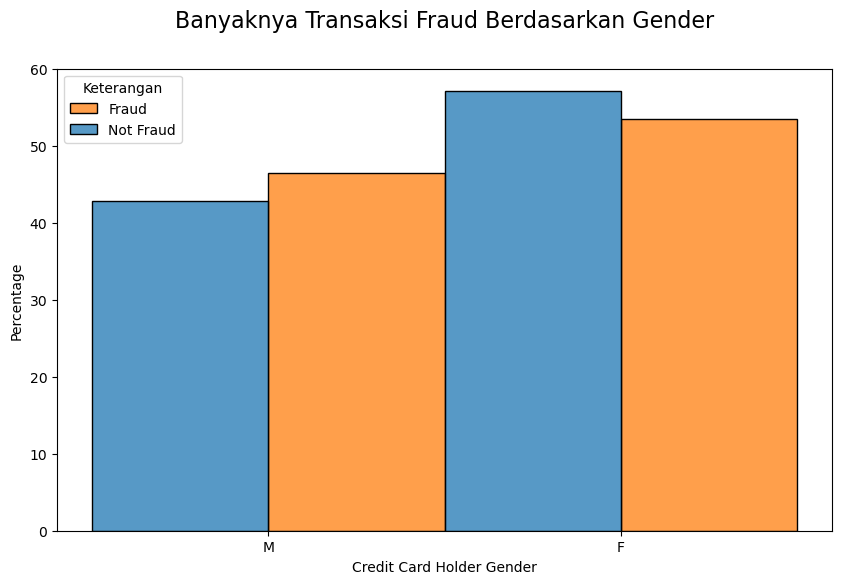

In [74]:
# Banyaknya transaksi fraud berdasarkan gender
plt.figure(figsize=(10,6))
ax=sns.histplot(x='gender',data=uts, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_title("Banyaknya Transaksi Fraud Berdasarkan Gender", fontsize=16, pad=30)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Keterangan', labels=['Fraud', 'Not Fraud'])

Melalui diagram di atas, diketahui bahwa baik transaksi fraud maupun non-fraud lebih banyak dilakukan oleh pelanggan wanita. Hal ini bisa diasumsikan bahwa peran belanja lebih sering dilakukan oleh wanita dibanding pria.

C:\Users\Acer\AppData\Local\Temp\ipykernel_14040\4219935737.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=uts, kind="bar", x='category', y='amt', hue='gender', ci=None)


<Figure size 1500x1000 with 0 Axes>

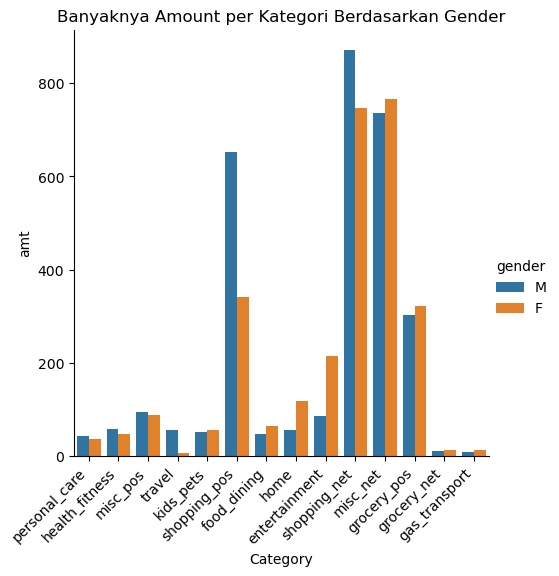

In [7]:
plt.figure(figsize=(15,10))
sns.catplot(data=uts, kind="bar", x='category', y='amt', hue='gender', ci=None)
plt.xlabel('Category')
plt.ylabel('amt')
plt.title('Banyaknya Amount per Kategori Berdasarkan Gender')
plt.xticks(rotation=45, horizontalalignment="right")

plt.show()

Dari diagram di atas dapat diketahui pula bahwa amount tertinggi lebih banyak dikeluarkan oleh pelanggan pria di kategori shopping_net, dan wanita mengeluarkan amount yang paling banyak pada kategori misc_net.

## Data Preprocessing
Melakukan data processing pada kolom category dan gender, kemudian melakukan one hot encoding

In [8]:
# lihat info data
uts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   no                     977 non-null    int64  
 1   trans_date_trans_time  977 non-null    object 
 2   merchant               977 non-null    object 
 3   category               977 non-null    object 
 4   amt                    977 non-null    float64
 5   gender                 977 non-null    object 
 6   is_fraud               977 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 53.6+ KB


In [9]:
# Import Package
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [10]:
# Melakukan One Hot Encoding dengan Pandas

# Select the columns to be one-hot encoded
columns_to_encode = ['category', 'gender']

# Perform one-hot encoding on the selected columns
encoded_columns = pd.get_dummies(uts[columns_to_encode], prefix=columns_to_encode, drop_first=True)
encoded_columns

,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,0,0,0,0,0,1,0,0,0,0,0,0,0,0
973,0,0,0,0,1,0,0,0,0,0,0,0,0,0
974,1,0,0,0,0,0,0,0,0,0,0,0,0,0
975,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [11]:
# menggabungkan encoded_columns ke dataframe awal
uts1 = pd.concat([uts[['amt','is_fraud']], encoded_columns], axis=1)

uts1.head()

,amt,is_fraud,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,2.86,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,29.84,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,41.28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,60.05,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,3.19,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


## Train Test Data

In [12]:
# Memisahkan fitur dan target

X = uts1.drop("is_fraud", axis=1)
y = uts1["is_fraud"]

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("t Test : ", len(y_test))

X Train :  781
y Train :  781
X Test :  196
t Test :  196


In [13]:
Input = sm.add_constant(X_test)

In [14]:
model = sm.Logit(y_test, Input)
result = model.fit()
print(result.summary2())

         Current function value: 0.261592
         Iterations: 35
                                    Results: Logit
Model:                     Logit                   Method:                  MLE       
Dependent Variable:        is_fraud                Pseudo R-squared:        0.622     
Date:                      2023-10-11 20:28        AIC:                     134.5440  
No. Observations:          196                     BIC:                     186.9938  
Df Model:                  15                      Log-Likelihood:          -51.272   
Df Residuals:              180                     LL-Null:                 -135.82   
Converged:                 0.0000                  LLR p-value:             3.7256e-28
No. Iterations:            35.0000                 Scale:                   1.0000    
--------------------------------------------------------------------------------------
                         Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
-------------

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
# Membangun model regresi logistik
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
uts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   no                     977 non-null    int64  
 1   trans_date_trans_time  977 non-null    object 
 2   merchant               977 non-null    object 
 3   category               977 non-null    object 
 4   amt                    977 non-null    float64
 5   gender                 977 non-null    object 
 6   is_fraud               977 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 53.6+ KB


In [32]:
# Prediksi pada data uji
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0],
      dtype=int64)

In [37]:
pred_results = pd.DataFrame(predictions, columns = ["logreg_pred"])
pred_results["prediksi"] = pred_results['logreg_pred'].apply(lambda x: 1 if x > 0.5 else 0)
pred_results['actual'] = y_train
pred_results

,logreg_pred,prediksi,actual
0,0,0,0.0
1,0,0,0.0
2,0,0,0.0
3,1,1,0.0
4,0,0,0.0
...,...,...,...
191,0,0,0.0
192,1,1,0.0
193,1,1,0.0
194,1,1,0.0


#### Langkah-langkah Pelatihan Regresi Logistik:
Berikut ini merupakan pengimplementasian pelatihan regresi logistik:
1. Melakukan data preprocessing dengan melakukan One Hot Encoding pada kolom 'gender' dan 'category'
2. Melakukan Train test untuk melatih algoritma dan mengetahui performa algoritma yang sudah dilatih sebelumnya ketika menemukan data baru yang belum pernah dilihat sebelumnya

## Evaluasi Model
Menggunakan Confusion Matrix

In [44]:
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf.predict(X_test)

In [45]:
#akurasi train data
X_pred = rf.predict(X_train)
training_data_accuracy = accuracy_score(X_pred,y_train)
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  1.0


### Membuat Confusion Matrix

In [51]:
# Import library
from sklearn.metrics import confusion_matrix

# Create confusion matrix
matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, predictions)
# Print confusion matrix
print(matrix)

[[94  6]
 [ 7 89]]


In [52]:
#akurasi test data
test_data_accuracy = accuracy_score(y_pred,y_test)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.9336734693877551


In [53]:
# Menampilkan hasil dari Confusion Matrix
print("Confusion Matrix:\n", matrix)
print("\nClassification Report:\n", report)

Confusion Matrix:
 [[94  6]
 [ 7 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89       100
           1       0.97      0.77      0.86        96

    accuracy                           0.88       196
   macro avg       0.90      0.88      0.88       196
weighted avg       0.89      0.88      0.88       196



Confusion Matrix adalah sebuah metode evaluasi kinerja model klasifikasi yang digunakan untuk mengukur seberapa akurat model tersebut dalam memprediksi kelas target. Confusion Matrix menampilkan jumlah data yang diklasifikasikan dengan benar dan salah ke dalam masing-masing kelas target. Confusion Matrix terdiri dari empat elemen, yaitu True Positive (TP), True Negative (TN), False Positive (FP), dan False Negative (FN). Dengan menggunakan Confusion Matrix, kita dapat menghitung beberapa metrik evaluasi seperti akurasi, presisi, recall, dan F1-score. Berikut adalah penjelasan singkat mengenai masing-masing metrik evaluasi:

- **Akurasi**: Akurasi adalah rasio antara jumlah data yang diklasifikasikan dengan benar dan jumlah total data.
- **Presisi**: Presisi adalah rasio antara jumlah data positif yang diklasifikasikan dengan benar dan jumlah total data positif yang diklasifikasikan.
- **Recall**: Recall adalah rasio antara jumlah data positif yang diklasifikasikan dengan benar dan jumlah total data positif.
- **F1-score**: F1-score adalah harmonic mean dari presisi dan recall.

Dengan menggunakan Confusion Matrix dan metrik evaluasi yang sesuai, kita dapat mengukur kinerja model secara objektif dan memperbaiki model jika diperlukan. Melihat hasil dari confusion matrix di atas, seluruh matrix evaluasi mendekati 1, artinya, model yang digunakan memiliki kinerja yang sangat baik dalam memprediksi kelas target

## Interpretasi Hasil

#### Interpretasi Koefisien

In [56]:
# Mendapatkan Koefisien dari Model Regresi Logistik
coefficients = model.coef_

# Print the coefficients
print(coefficients)

[[ 0.00768087 -0.12714647  3.73304964  2.14048474  2.98478781 -0.44588225
  -0.70698875 -0.73359748  0.01736994  0.60030009 -0.23463487 -1.4457612
  -1.60775164  0.42351679 -1.01757921]]


In [57]:
# Melihat Koefisien Per Kolom Dataframe awal
koefisien_uts = pd.DataFrame(coef, index=X.columns, columns=["Koefisien"])

print(koefisien_uts)

                         Koefisien
amt                       0.007681
category_food_dining     -0.127146
category_gas_transport    3.733050
category_grocery_net      2.140485
category_grocery_pos      2.984788
category_health_fitness  -0.445882
category_home            -0.706989
category_kids_pets       -0.733597
category_misc_net         0.017370
category_misc_pos         0.600300
category_personal_care   -0.234635
category_shopping_net    -1.445761
category_shopping_pos    -1.607752
category_travel           0.423517
gender_M                 -1.017579


Koefisien dari model regresi logistik menunjukkan seberapa besar pengaruh setiap variabel independen (fitur) terhadap probabilitas terjadinya peristiwa dari variabel target. 

Jika koefisien positif, maka kenaikan nilai fitur akan meningkatkan probabilitas terjadinya peristiwa dari variabel target. Maka semakin tinggi nilai fitur, semakin besar kemungkinan peristiwa yang diamati terjadi. Ini bisa diartikan bahwa semakin besar nilai fitur, semakin besar probabilitas terjadinya peristiwa tersebut.

Jika koefisien negatif, maka kenaikan nilai fitur akan mengurangi probabilitas terjadinya peristiwa dari variabel target. Semakin tinggi nilai fitur, semakin kecil kemungkinan peristiwa yang diamati terjadi. Ini bisa diartikan bahwa semakin besar nilai fitur, semakin kecil probabilitas terjadinya peristiwa tersebut. 

#### Odds Ratio

In [61]:
# Calculate the odds ratios
odds_ratios = np.exp(coefficients)

# Print the odds ratios
print(odds_ratios)

[[ 1.00771045  0.88060468 41.8064086   8.50355867 19.78230426  0.64025916
   0.49312689  0.48017845  1.01752168  1.82266568  0.79085956  0.23556669
   0.20033754  1.5273234   0.36146892]]


In [66]:
koefisien_uts['Odds_Ratio'] = np.exp(koefisien_uts['Koefisien'])

print(koefisien_uts)

                         Koefisien  Odds_Ratio  odds_ratios
amt                       0.007681    1.007710     1.007710
category_food_dining     -0.127146    0.880605     0.880605
category_gas_transport    3.733050   41.806409    41.806409
category_grocery_net      2.140485    8.503559     8.503559
category_grocery_pos      2.984788   19.782304    19.782304
category_health_fitness  -0.445882    0.640259     0.640259
category_home            -0.706989    0.493127     0.493127
category_kids_pets       -0.733597    0.480178     0.480178
category_misc_net         0.017370    1.017522     1.017522
category_misc_pos         0.600300    1.822666     1.822666
category_personal_care   -0.234635    0.790860     0.790860
category_shopping_net    -1.445761    0.235567     0.235567
category_shopping_pos    -1.607752    0.200338     0.200338
category_travel           0.423517    1.527323     1.527323
gender_M                 -1.017579    0.361469     0.361469


Odds Ratio adalah ukuran asosiasi paparan (faktor risiko) dengan kejadian. Output Odds Ratio menunjukkan seberapa besar pengaruh variabel independen terhadap variabel dependen. Jika nilai Odds Ratio lebih besar dari 1, maka variabel independen memiliki pengaruh positif terhadap variabel dependen. Sebaliknya, jika nilai Odds Ratio kurang dari 1, maka variabel independen memiliki pengaruh negatif terhadap variabel dependen. Jika nilai Odds Ratio sama dengan 1, maka tidak ada pengaruh antara variabel independen dan dependen. Dalam hal ini, variabel dependen adalah kolom 'is_fraud', dan variabel independennya adalah kolom 'category'.

# Kesimpulan

Berdasarkan hasil dari koefisien dan odds-ratio di atas, kita tahu bahwa variabel target atau peristiwa yang dimungkinkan terjadi adalah kejadian transaksi fraud. Berikut merupakan ringkasannya:

### Koefisien

a. Jika Koefisien positif, maka kenaikan nilai fitur (category) akan *memperbesar* kemungkinan terjadinya transaksi fraud

b. Jika Koefisien negatif, maka kenaikan nilai fitur (category) justru akan *memperkecil* kemungkinan terjadinya transaksi fraud

### Odds-Ratio

a. Jika odds-ratio > 1, variabel independen berpengaruh positif terhadap variabel dependen

b. Jika odds-ratio < 1, variabel independen berpengaruh negatif terhadap variabel dependen

c. Jika odds-ratio = 1, tidak ada pengaruh antara variabel independen dan dependen

## Hasil
Melalui ketentuan di atas, dapat disimpulkan bahwa potensi terjadinya transaksi fraud ada pada category: gas_transport, grocery_net, grocery_pos, misc_net, misc_post, dan travel. 

Mengetahui hal ini, maka perusahaan perlu memberlakukan regulasi dan pengawasan yang lebih ketat terkait transaksi pada perusahaan agar probabilitas terjadinya fraud dapat semakin berkurang.